In [1]:
## Importing Libraries 
import pandas as pd 
import numpy as np
import nsepy as nse
%matplotlib inline
import matplotlib.pylab as plt
import datetime as dt

In [ ]:
## Function for interpolationm of data between two points it is used because to make the data equvispaced because after every
## 5 days there is gap of 2 days so this function will linearly interpolate the data of those two days 
def interpolation(df,timeseries_var):
    for var in timeseries_var:
        df[var]=df[var].interpolate(method='spline', order=1)
    return df

In [90]:
# Importing the data 
infy1 = nse.get_history(symbol='INFY',start=dt.date(2015,1,1),end=dt.date(2016,1,1))
tcs1 = nse.get_history(symbol='TCS',start=dt.date(2015,1,1),end=dt.date(2016,1,1))
niftyit1=nse.get_history(symbol='NIFTY IT',start=dt.date(2015,1,1),end=dt.date(2016,1,1),index=True)

In [91]:
infy1.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


In [92]:
tcs1.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883
2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683
2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207
2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894
2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724


In [93]:
niftyit1.head()

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09
2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09
2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10
2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10
2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10


In [94]:
## As our data is not equvispaced we are taking a new dataframe in which index i.e. is of full year including the dates for which
## data is not available then the original data is concatenated with new index of dates which will create some NaN values which
## will be filled by interpolation.
infy=pd.DataFrame(columns={'Date'})
infy['Date']=pd.date_range(start='2015-1-1', end='2015-12-31', freq='D')
infy.set_index('Date',inplace=True)
infy=pd.concat([infy,infy1],axis=1)

tcs=pd.DataFrame(columns={'Date'})
tcs['Date']=pd.date_range(start='2015-1-1', end='2015-12-31', freq='D')
tcs.set_index('Date',inplace=True)
tcs=pd.concat([tcs,tcs1],axis=1)

niftyit=pd.DataFrame(columns={'Date'})
niftyit['Date']=pd.date_range(start='2015-1-1', end='2015-12-31', freq='D')
niftyit.set_index('Date',inplace=True)
niftyit=pd.concat([niftyit,niftyit1],axis=1)

In [95]:
infy.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.4,1971.34,500691.0,9.870306e+13,14908.0,258080.0,0.5154
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.2,2003.25,1694580.0,3.394669e+14,54166.0,1249104.0,0.7371
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.9,2004.59,2484256.0,4.979911e+14,82694.0,1830962.0,0.7370


In [96]:
tcs.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.0,2545.55,2548.51,183415.0,4.674345e+13,8002.0,52870.0,0.2883
2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.4,2579.45,2568.19,462870.0,1.188740e+14,27585.0,309350.0,0.6683
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.1,2540.25,2563.94,877121.0,2.248886e+14,43234.0,456728.0,0.5207


In [97]:
niftyit.head()

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150.0,3.575100e+09
2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862.0,9.645600e+09
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018.0,1.059000e+10


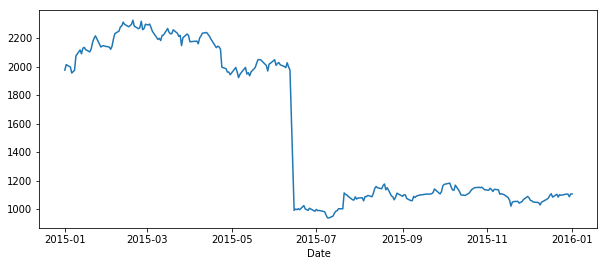

In [239]:
## Plot for closing price of infy
infy1['Close'].plot(figsize = (10,4))

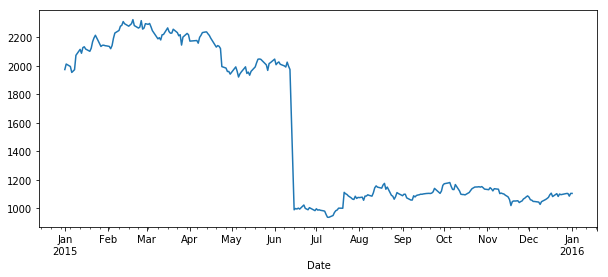

In [240]:
## Plot for closing price of infy after filling of NaN values by interpolation 
infy['Close'].interpolate(method='spline', order=1).plot(figsize = (10,4))

In [ ]:
## As we have seen that the two graphs are identical we can use linear interpolation technique for filling of NaN/Missing values

In [100]:
## Variables/Columns for which interpolation is to be done is added in the list 
infy_interpolat_var=[]
for var in infy.columns:
    infy_interpolat_var.append(var)
infy_interpolat_var.remove('Symbol')
infy_interpolat_var.remove('Series')
print(infy_interpolat_var)

['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble']


In [101]:
## Variables/Columns for which interpolation is to be done is added in the list 
tcs_interpolat_var=[]
for var in tcs.columns:
    tcs_interpolat_var.append(var)
tcs_interpolat_var.remove('Symbol')
tcs_interpolat_var.remove('Series')
print(tcs_interpolat_var)

['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble']


In [102]:
## Variables/Columns for which interpolation is to be done is added in the list 
niftyit_interpolat_var=[]
for var in niftyit.columns:
    niftyit_interpolat_var.append(var)
print(niftyit_interpolat_var)

['Open', 'High', 'Low', 'Close', 'Volume', 'Turnover']


In [105]:
## Interpolation of Values for all three DataFrame() the function used is described at the start of the Program 
infy=interpolation(infy,infy_interpolat_var)
infy['Symbol']='INFY'
infy['Series']='EQ'
tcs=interpolation(tcs,tcs_interpolat_var)
tcs['Symbol']='TCS'
tcs['Series']='EQ'
niftyit=interpolation(niftyit,niftyit_interpolat_var)

In [106]:
infy.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.550000,1968.950000,1982.000000,1956.900000,1971.00000,1974.400000,1971.340000,5.006910e+05,9.870306e+13,14908.000000,2.580800e+05,0.515400
2015-01-02,INFY,EQ,1974.400000,1972.000000,2019.050000,1972.000000,2017.95000,2013.200000,2003.250000,1.694580e+06,3.394669e+14,54166.000000,1.249104e+06,0.737100
2015-01-03,INFY,EQ,1987.339056,1984.627025,2022.605970,1973.735658,2010.48614,2007.270805,2003.566394,1.957805e+06,3.923083e+14,63675.344106,1.443057e+06,0.703002
2015-01-04,INFY,EQ,2000.263908,1997.229753,2026.217413,1975.478588,2003.18647,2001.472261,2003.943778,2.221031e+06,4.451497e+14,73184.804404,1.637009e+06,0.702770
2015-01-05,INFY,EQ,2013.200000,2009.900000,2030.000000,1977.500000,1996.00000,1995.900000,2004.590000,2.484256e+06,4.979911e+14,82694.000000,1.830962e+06,0.737000


In [107]:
tcs.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.250000,2567.000000,2567.000000,2541.000000,2550.000000,2545.550000,2548.510000,183415.000000,4.674345e+13,8002.000000,52870.000000,0.288300
2015-01-02,TCS,EQ,2545.550000,2551.000000,2590.950000,2550.600000,2588.400000,2579.450000,2568.190000,462870.000000,1.188740e+14,27585.000000,309350.000000,0.668300
2015-01-03,TCS,EQ,2556.935922,2561.415632,2593.725850,2541.688113,2571.528708,2566.206384,2566.719640,600953.670194,1.542122e+14,32801.377309,358475.508180,0.660551
2015-01-04,TCS,EQ,2568.154478,2571.771320,2596.522276,2532.775138,2554.722552,2553.047000,2565.246028,739037.430743,1.895504e+14,38018.037336,407602.984703,0.660605
2015-01-05,TCS,EQ,2579.450000,2581.000000,2599.900000,2524.650000,2538.100000,2540.250000,2563.940000,877121.000000,2.248886e+14,43234.000000,456728.000000,0.520700


In [108]:
niftyit.head()

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2015-01-01,11214.800000,11235.750000,11166.350000,11215.700000,4.246150e+06,3.575100e+09
2015-01-02,11214.650000,11399.100000,11214.650000,11372.100000,1.000486e+07,9.645600e+09
2015-01-03,11265.708755,11410.500959,11205.211812,11330.744843,9.622581e+06,9.960400e+09
2015-01-04,11316.603757,11421.984342,11195.760598,11289.497067,9.240300e+06,1.027520e+10
2015-01-05,11369.350000,11433.750000,11186.950000,11248.550000,8.858018e+06,1.059000e+10


In [179]:
## Function for finding moving averages of of a Dataframe of a given column for a given number of week 
## -->> If number of days for a given number of week is even the we have to do centring also ie if we have to find moving
##      average for 4 days then first value of moving average should be placed at median ie at 2.5 position but this position does not exist
##      that'why we take mean of moving average of that term and next term i.e. mean of 2.5 and 3.5 position i.e. 3 which is available
##      so now first term will be place at position 3.
## -->> If number of days are odd then we do not have to do centring because median of a odd term edxist e.g. median of 5 is 3 
##      if we have finf moving average of 5 then first term will be placed at position 3
def moving_average(df,col,number_of_week):
    new=pd.DataFrame()
    number_days=number_of_week*7
    if((number_days%2)==0):
        new[number_days]=df[col].rolling(window = number_days).mean().dropna()
        new['Shift']=new[number_days].shift(-1)
        new.dropna(inplace=True)
        new[str(number_of_week)+'_week_mov_avg']=(new[number_days]+new['Shift'] )/2
        new.drop([number_days,'Shift'],axis=1,inplace=True)
    else:
        new[str(number_of_week)+'_week_mov_avg']=df[col].rolling(window = number_days).mean().dropna()
    return new

In [182]:
moving_average(infy,'Close',4).head()

,4_week_mov_avg
Date,
2015-01-28,2094.951598
2015-01-29,2100.305169
2015-01-30,2104.986010
2015-01-31,2109.819086
2015-02-01,2114.786501


In [183]:
moving_average(infy,'Close',16).head()

,16_week_mov_avg
Date,
2015-04-22,2191.840064
2015-04-23,2192.418635
2015-04-24,2192.270594
2015-04-25,2192.143911
2015-04-26,2192.034690


In [185]:
moving_average(tcs,'Close',4).head()

,4_week_mov_avg
Date,
2015-01-28,2513.057669
2015-01-29,2511.302311
2015-01-30,2508.257326
2015-01-31,2506.071621
2015-02-01,2504.726437


In [186]:
moving_average(tcs,'Close',16).head()

,16_week_mov_avg
Date,
2015-04-22,2567.769369
2015-04-23,2566.989458
2015-04-24,2566.284722
2015-04-25,2565.709754
2015-04-26,2565.275013


In [187]:
moving_average(niftyit,'Close',4).head()

,4_week_mov_avg
Date,
2015-01-28,11537.529078
2015-01-29,11556.477292
2015-01-30,11574.120103
2015-01-31,11594.671423
2015-02-01,11618.080825


In [188]:
moving_average(niftyit,'Close',16).head()

,16_week_mov_avg
Date,
2015-04-22,12068.834532
2015-04-23,12068.816675
2015-04-24,12066.809689
2015-04-25,12065.069439
2015-04-26,12063.592873


In [189]:
infy.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.550000,1968.950000,1982.000000,1956.900000,1971.00000,1974.400000,1971.340000,5.006910e+05,9.870306e+13,14908.000000,2.580800e+05,0.515400
2015-01-02,INFY,EQ,1974.400000,1972.000000,2019.050000,1972.000000,2017.95000,2013.200000,2003.250000,1.694580e+06,3.394669e+14,54166.000000,1.249104e+06,0.737100
2015-01-03,INFY,EQ,1987.339056,1984.627025,2022.605970,1973.735658,2010.48614,2007.270805,2003.566394,1.957805e+06,3.923083e+14,63675.344106,1.443057e+06,0.703002
2015-01-04,INFY,EQ,2000.263908,1997.229753,2026.217413,1975.478588,2003.18647,2001.472261,2003.943778,2.221031e+06,4.451497e+14,73184.804404,1.637009e+06,0.702770
2015-01-05,INFY,EQ,2013.200000,2009.900000,2030.000000,1977.500000,1996.00000,1995.900000,2004.590000,2.484256e+06,4.979911e+14,82694.000000,1.830962e+06,0.737000


In [220]:
## Function to create time series for a dataframe for a given column for a given sgock value 
def shock(df,col,shock_value):
    new=pd.DataFrame()
    shock=(((df[col]-df[col].shift(-1))/df[col])*100).dropna()
    new[str(col)+'_shock']= shock.apply(lambda x: 1 if x >= shock_value else 0)
    new[str(col)+'_shock_dir']= shock.apply(lambda x: 1 if x >= 0 else 0)
    return new  

### PART1 : 3.1 

In [223]:
shock(infy,'Volume',10).head()

,Volume_shock,Volume_shock_dir
Date,,
2015-01-01,0,0
2015-01-02,0,0
2015-01-03,0,0
2015-01-04,0,0
2015-01-05,0,1


In [224]:
shock(tcs,'Volume',10).head()

,Volume_shock,Volume_shock_dir
Date,,
2015-01-01,0,0
2015-01-02,0,0
2015-01-03,0,0
2015-01-04,0,0
2015-01-05,0,0


In [225]:
shock(niftyit,'Volume',10).head()

,Volume_shock,Volume_shock_dir
Date,,
2015-01-01,0,0
2015-01-02,0,1
2015-01-03,0,1
2015-01-04,0,1
2015-01-05,0,0


### PART 1 3.2

In [226]:
shock(infy,'Close',2).head()

,Close_shock,Close_shock_dir
Date,,
2015-01-01,0,0
2015-01-02,0,1
2015-01-03,0,1
2015-01-04,0,1
2015-01-05,1,1


In [233]:
shock(tcs,'Close',2).head()

,Close_shock,Close_shock_dir
Date,,
2015-01-01,0,0
2015-01-02,0,1
2015-01-03,0,1
2015-01-04,0,1
2015-01-05,1,1


In [234]:
shock(niftyit,'Close',2).head()

,Close_shock,Close_shock_dir
Date,,
2015-01-01,0,0
2015-01-02,0,1
2015-01-03,0,1
2015-01-04,0,1
2015-01-05,1,1


In [ ]:
## Part 3.3 looks exactly same as part 3.2 so left intentianally 
## Didn't understand the context for Part 3.4 
## Could not understand what to do after rolling window has been taken in Part 2 i.e. how to predict with it i.e. either to do regression,mean etc. 

In [259]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [262]:
p = figure(x_axis_type="datetime", title="Close Price", plot_height=350, plot_width=800)
p.xgrid.grid_line_color=None
p.ygrid.grid_line_alpha=0.5
p.xaxis.axis_label = 'Time'
p.yaxis.axis_label = 'Value'
p.line(infy.index, infy.Close)
show(p)